# Lab Assignment 2 - Alyssa Vallery 
####     210013982
####   Link to GitHub Repository - https://github.com/alyssavallery/MyFirstRepo


#### Run this cell to connect to your GIS and get started:

In [2]:
from arcgis.gis import GIS
gis = GIS("home")

## Part 1: Python Basics 

##### Task 1: 

In [3]:
#define a function to test if a number is divisible by three (using the % to find is the remainder when divided by three is equal to zero) and print an appropriate message 
def divisibility_by_three(n):
    if n % 3 == 0:
        print(str(n) + " is divisible by 3")
    else:
        print(str(n) + " is not divisible by three")

# test the function using 15 as an example number 
divisibility_by_three(15)


15 is divisible by 3


##### Task 2: 

In [5]:
# Define a function to test if a given fruit is found in the list of acceptable fruits, the function takes the fruit as an input and then an if ... else statement is used to determine what statement should be printed 
def test_fruit(fruit):
    acceptable_fruits = ["apple", "orange", "pear", "kiwi", "strawberry"]
    
    if fruit.lower() in acceptable_fruits:
        print(str(fruit) + " is acceptable.")
    else:
        print(str(fruit) + " is not acceptable.")

# Test the function 
test_fruit("Banana")


Banana is not acceptable.


##### Task 3:  

In [10]:
import math as m

# define the haversine formula as a function 
def haversine(coord1, coord2):
    R = 6371.0

    # Coordinates in decimal degrees (latitude, longitude)
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    # Convert latitude and longitude from degrees to radians
    radians1 = m.radians(lat1)
    radians2 = m.radians(lat2)
    delta_phi = m.radians(lat2 - lat1)
    delta_lambda = m.radians(lon2 - lon1)

    # Haversine formula
    a = m.sin(delta_phi / 2)**2 + m.cos(radians1) * m.cos(radians2) * m.sin(delta_lambda / 2)**2
    c = 2 * m.atan2(m.sqrt(a), m.sqrt(1 - a))

    # Distance in kilometers
    distance = R * c

    return str(distance) + " km"

# Test the function with Edinburgh and London as an example  
coord1 = [55.9533, -3.1882]  # Latitude and Longitude of Edinburgh
coord2 = [51.5074, -0.1278]       # Latitude and Longitude of London

haversine(coord1, coord2)



'533.6497276790707 km'

## Part 2: Pandas and NumPy

In [3]:
import numpy as np
import pandas as pd

In [5]:
# use pandas to read the csv file 
trees_df = pd.read_csv('/arcgis/home/assignment2/portland_park_trees.csv', sep=",", header=0, encoding="ISO-8859-1")

# display the first 5 rows of the dataset 
trees_df.head(5)


,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
0,1,426,2017/05/09,PSME,37.4,Fair,105.0,44.0,57.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
1,2,427,2017/05/09,PSME,32.5,Fair,94.0,49.0,45.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
2,3,428,2017/05/09,CRLA,9.7,Fair,23.0,28.0,27.0,staff,...,Crataegus,Lavalle hawthorn,Crataegus x lavalleei,BD,S,No,NaN,NaN,North America - a hybrid between a Mexican and...,"Like most hawthorns, the tree has stout thorns..."
3,4,429,2017/05/09,QURU,10.3,Poor,28.0,38.0,31.0,staff,...,Quercus,northern red oak,Quercus rubra,BD,L,No,NaN,NaN,North America - eastern Canada and eastern USA...,Acorns take two years to mature and are an imp...
4,5,430,2017/05/09,PSME,33.2,Fair,102.0,43.0,44.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...


##### Question 1: There are 5675 trees of the Quercus or Acer genus. 

In [6]:
# Filter the DataFrame for trees with Genus 'Quercus' or 'Acer'
trees_2 = trees_df[(trees_df['Genus'] == "Quercus") | (trees_df['Genus'] == "Acer")]
trees_2.head(5)

# Find the number of rows in the filtered data frame 
print(len(trees_2))

5675


##### Question 2: There are 124 trees of the Quercus or Acer genus with a DBH larger than 50 inches. 

In [5]:
# Read the CSV file
trees_df = pd.read_csv('/arcgis/home/assignment2/portland_park_trees.csv', sep=",", header=0, encoding="ISO-8859-1")

# Filter the DataFrame for trees with Genus 'Quercus' or 'Acer' and DBH larger than 50 inches
filtered_trees = trees_df[((trees_df['Genus'] == "Quercus") | (trees_df['Genus'] == "Acer")) & (trees_df['DBH'] > 50)]

# Count the number of trees that meet the criteria
number_of_trees = len(filtered_trees)

print(f"Number of trees of the Quercus or Acer genus and have a DBH larger than 50 inches: {number_of_trees}")


Number of trees of the Quercus or Acer genus and have a DBH larger than 50 inches: 124


##### Question 3: The genus with the highest mean DBH is Quercus with a mean DBH of 23.27 inches. 

In [11]:
# Filter the DataFrame for the specified genera
trees_3 = trees_df[(trees_df['Genus'] == "Quercus") | (trees_df['Genus'] == "Acer")|(trees_df['Genus'] == "Fraxinus")]

# Group by 'Genus' and calculate mean DBH for each genus
mean_dbh_per_genus = trees_3.groupby('Genus')['DBH'].mean()

# Find the genus with the highest mean DBH
highest_mean_dbh_genus = mean_dbh_per_genus.idxmax()
highest_mean_dbh_value = mean_dbh_per_genus.max()

print(f"Genus with the highest mean DBH: {highest_mean_dbh_genus} with a mean DBH of {highest_mean_dbh_value} inches.")

Genus with the highest mean DBH: Quercus with a mean DBH of 23.56823839157492 inches.


##### Question 4: There are 20 different species of tree recorded in the Acer genus. 

In [6]:
# Filter the DataFrame for the Acer genus
acer_trees = trees_df[trees_df['Genus'] == "Acer"]

# Count the unique species in the Acer genus
print(acer_trees['Genus_spec'].nunique())


20


##### Question 5: 

In [6]:
worldcities_df = pd.read_csv('/arcgis/home/assignment2/world_cities.csv', sep=",", header=0, encoding="ISO-8859-1")
worldcities_df.head(5)


,city,country,pop,lat,lon,capital
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0
4,'Abud,Palestine,2456,32.03,35.07,0


In [7]:
worldcities_df = pd.read_csv('/arcgis/home/assignment2/world_cities.csv', sep=",", header=0, encoding="ISO-8859-1")
worldcities_df.head(5)


# create a new column with population in millions by dividing the original population values by 1,000,000
worldcities_df['pop_M'] = worldcities_df['pop'] / 1000000
worldcities_df.head(5)

,city,country,pop,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0,0.021817
4,'Abud,Palestine,2456,32.03,35.07,0,0.002456


In [25]:
# remove the original population column 
worldcities_df = worldcities_df.drop(columns=['pop'])
worldcities_df.head(5)

,city,country,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,29.36,47.98,0,0.021817
4,'Abud,Palestine,32.03,35.07,0,0.002456


In [27]:
# Filter to just include Amsterdam
amsterdam_df = worldcities_df[worldcities_df['city'] == 'Amsterdam']
amsterdam_df.head()


,city,country,lat,lon,capital,pop_M
1356,Amsterdam,Netherlands,52.37,4.89,1,0.744159


In [9]:
# Filter for cities in the Netherlands
netherlands_cities = worldcities_df[worldcities_df['country'] == 'Netherlands']

# Sort the cities by population size in descending order and select the top five
top_5_cities = netherlands_cities.sort_values(by='pop_M', ascending=False).head(5)

# Display the top five cities
top_5_cities.head()

,city,country,pop,lat,lon,capital,pop_M
1356,Amsterdam,Netherlands,744159,52.37,4.89,1,0.744159
31705,Rotterdam,Netherlands,597481,51.93,4.48,0,0.597481
43643,s-Gravenhage,Netherlands,479525,52.07,4.30,0,0.479525
39731,Utrecht,Netherlands,280559,52.10,5.11,0,0.280559
10243,Eindhoven,Netherlands,211367,51.44,5.47,0,0.211367


## Part 3: Python Data Visualisation

In [1]:
import matplotlib.pyplot as plt

#Change the default plot size.
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8] 

import seaborn as sns

In [2]:
#use pandas to read the csv file 
trees_df = pd.read_csv('/arcgis/home/assignment2/portland_park_trees.csv', sep=",", header=0, encoding="ISO-8859-1")

NameError: name 'pd' is not defined

##### Graph 1:

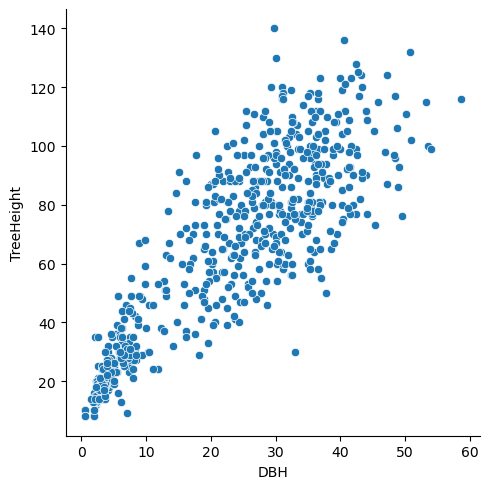

In [8]:
#filter the dataframe to just include trees of the genus Ulmus 
ulmus_trees = trees_df[trees_df['Genus'] == 'Ulmus']

# create the scatterplot 
sns.relplot(x=ulmus_trees['DBH'], y=ulmus_trees['TreeHeight'])

##### Graph 2: 

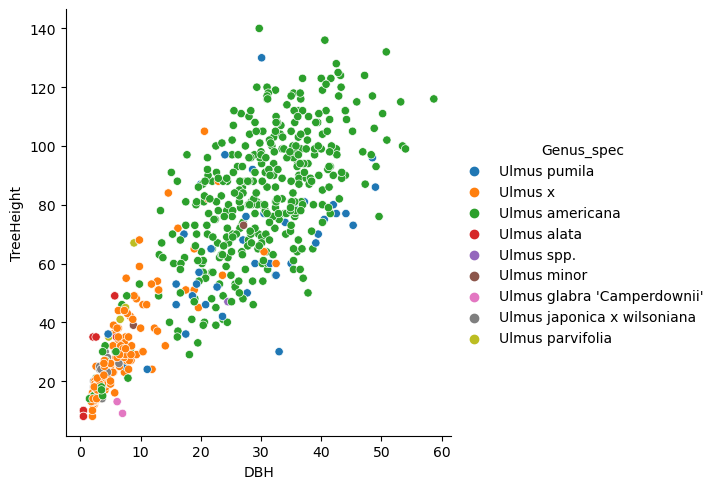

In [39]:
# create a scatterplot with DBH (x-axis), Tree height (y-axis)and the species as the hue 
sns.relplot(x=ulmus_trees['DBH'], y=ulmus_trees['TreeHeight'], hue=ulmus_trees['Genus_spec'])

##### Graph 3: 

<AxesSubplot: xlabel='Species', ylabel='DBH'>

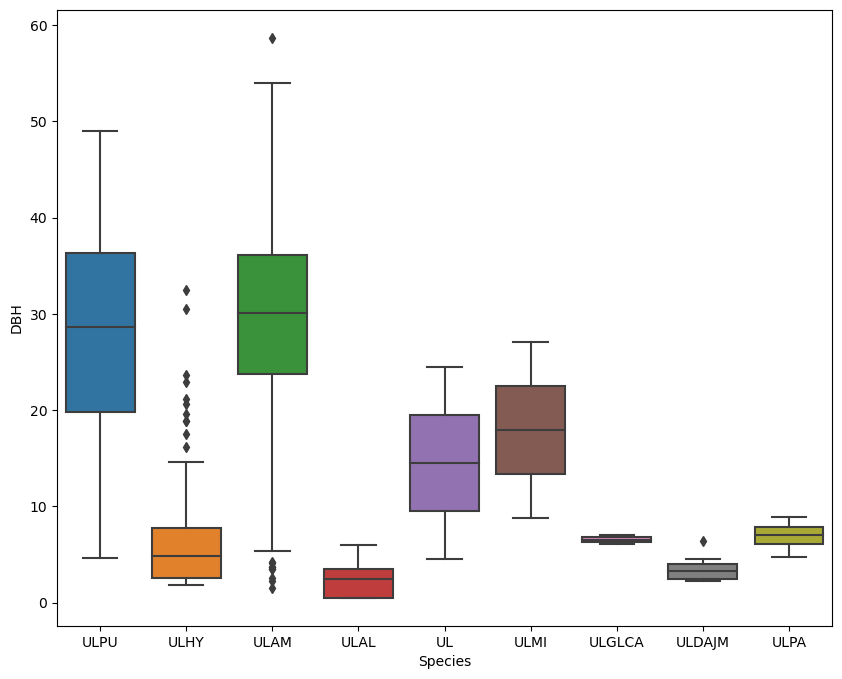

In [40]:
#create a boxplot of DBH differentiated by species 
sns.boxplot(x='Species', y='DBH', data=ulmus_trees)

##### Graph 4: Combine graphs 1 and 3 into a single figure (not not include a legend)

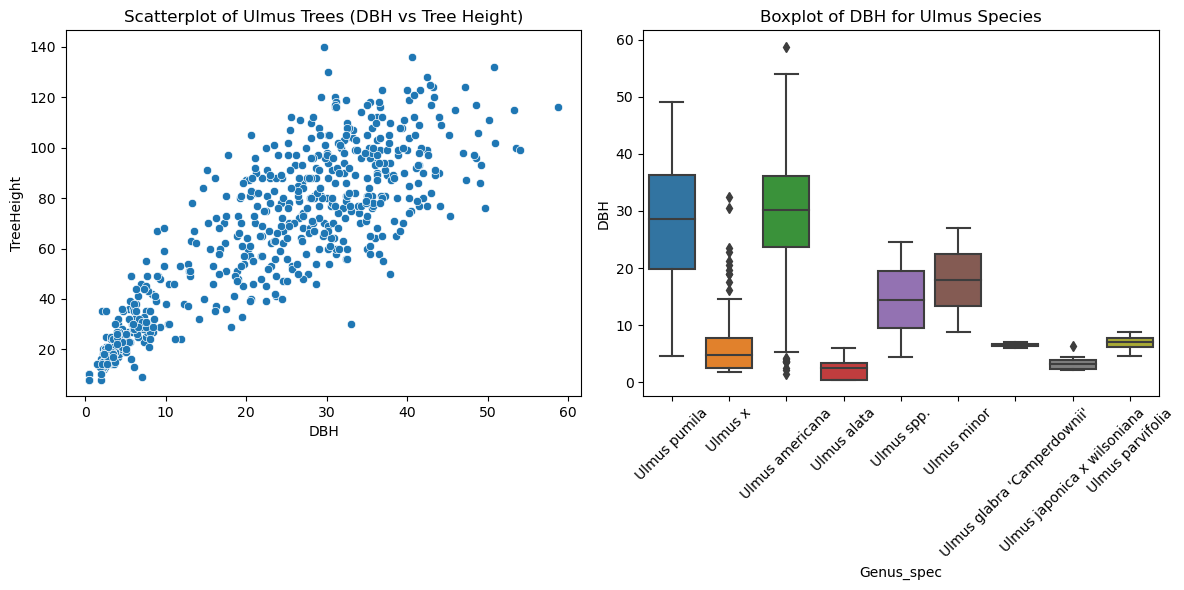

In [10]:
# Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graph 1: Scatterplot 
sns.scatterplot(x='DBH', y='TreeHeight', data=ulmus_trees, ax=axs[0])
axs[0].set_title('Scatterplot of Ulmus Trees (DBH vs Tree Height)')


# Graph 3: Boxplot 
sns.boxplot(x='Genus_spec', y='DBH', data=ulmus_trees, ax=axs[1])
axs[1].set_title('Boxplot of DBH for Ulmus Species')
axs[1].tick_params(axis='x', rotation=45)  # Rotate x labels for clarity


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Part 4: Python GeoPandas 

##### install packages  

In [5]:
pip install contextily

  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/83/35/562e72099bf50228fa2a8e161db35a94090f3939cb73aa54e385096ca3ff/contextily-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e1/58/9289c6a03116025cdb61461d99b2493daa4967a80b13755463d71a0affeb/geopy-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for xyzservices from https://files.pythonhosted.org/packages/82/c3/e06dfa46464cce3eda4b86df8847cab99d9bc545c76807ee689545187a4c/xyzservices-2023.10.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install mapclassify

  Obtaining dependency information for mapclassify from https://files.pythonhosted.org/packages/3f/f1/8db36df379703311c16e5341b408dad04e34cfded66f38e351c380fbd5ae/mapclassify-2.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=1.23 from https://files.pythonhosted.org/packages/2f/75/f007cc0e6a373207818bef17f463d3305e9dd380a70db0e523e7660bf21f/numpy-1.26.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.0 MB/s eta 0:00:00
  Obtaining dependency information for numpy>=1.23 from https://files.pythonhosted.org/packages/69/1f/c95b1108a9972a52d7b1b63ed8ca70466b59b8c1811bd121f1e667cc45d8/numpy-1.25.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 44.4 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:
      Successfully uninstalled nu

In [7]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

In [15]:
pip install folium matplotlib mapclassify branca

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/a2/1a/37c7ee1bc806d6c32621fecc72c19f6a9f9b4369e5e8f406a7c16d49f031/folium-0.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


##### Task 1:  Read the dataset you download as GeoPandas DataFrame

<AxesSubplot: >

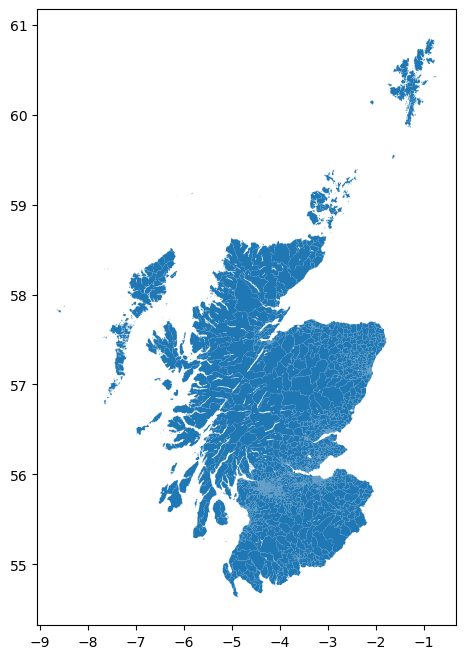

In [16]:
# use geopandas to read the shapefile
deprivation = gpd.read_file('/arcgis/home/assignment2/SIMD_20_Geo.shp')
deprivation.plot()

##### Task 2: Plot the first 5 and the last 5 sets of records in your selected dataset.

In [17]:
deprivation.head(5)

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,S01006506,Culter - 01,Aberdeen City,894,580,4691,4,7,14,68,...,4664.0,87,10,10%,1%,3248.0,11801.872345,0.157628,0.000650,"POLYGON ((-2.27749 57.09526, -2.27644 57.09520..."
1,S01006507,Culter - 02,Aberdeen City,793,470,4862,4,7,14,70,...,4602.0,85,4,10%,0%,3486.0,2900.406362,0.037968,0.000033,"POLYGON ((-2.27355 57.10448, -2.27333 57.10447..."
2,S01006508,Culter - 03,Aberdeen City,624,461,5686,5,9,17,82,...,4563.5,31,8,5%,1%,5342.0,3468.761949,0.043980,0.000040,"POLYGON ((-2.27444 57.10170, -2.27238 57.10045..."
3,S01006509,Culter - 04,Aberdeen City,537,307,4332,4,7,13,63,...,5626.0,42,6,7%,1%,4394.5,1647.461389,0.020651,0.000014,"POLYGON ((-2.26612 57.10132, -2.26599 57.10091..."
4,S01006510,Culter - 05,Aberdeen City,663,415,3913,3,6,12,57,...,3885.0,50,7,9%,1%,3736.0,3026.111412,0.040130,0.000027,"POLYGON ((-2.26014 57.10159, -2.26051 57.10133..."


In [18]:
deprivation.tail(5)

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Le_1,Shape_Area,geometry
6971,S01013477,Broxburn South - 06,West Lothian,612,355,2464,2,4,8,36,...,3161.0,93,10,15%,2%,1671.0,1775.782199,0.023189,0.000016,"POLYGON ((-3.46323 55.93433, -3.46319 55.93407..."
6972,S01013478,Broxburn East - 01,West Lothian,817,582,3681,3,6,11,53,...,1819.0,87,1,10%,0%,3594.0,2319.192976,0.029404,0.000018,"POLYGON ((-3.48355 55.93732, -3.48354 55.93728..."
6973,S01013479,Broxburn East - 02,West Lothian,785,479,1423,2,3,5,21,...,795.0,96,9,12%,1%,2624.0,3234.544766,0.041514,0.000038,"POLYGON ((-3.46663 55.93627, -3.46652 55.93622..."
6974,S01013480,Broxburn East - 03,West Lothian,677,410,3291,3,5,10,48,...,5007.0,107,1,16%,0%,1865.0,1598.577583,0.021329,0.000014,"POLYGON ((-3.46259 55.93774, -3.46243 55.93724..."
6975,S01013481,Broxburn East - 04,West Lothian,462,305,5269,4,8,16,76,...,2364.0,67,2,15%,0%,2082.0,13900.390027,0.190560,0.000736,"POLYGON ((-3.44318 55.93923, -3.44284 55.93908..."


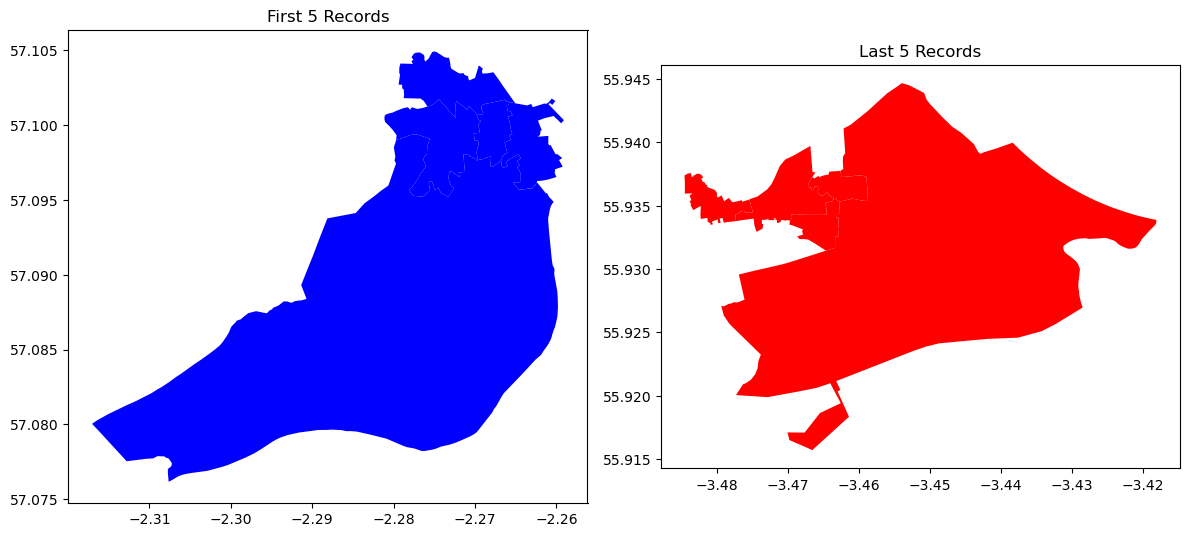

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# plot the first 5 records in the dataset 
deprivation.head(5).plot(ax=axs[0], color='blue')
axs[0].set_title('First 5 Records')

# plot the last 5 records in the dataset 
deprivation.tail(5).plot(ax=axs[1], color='red')
axs[1].set_title('Last 5 Records')

plt.tight_layout()
plt.show()

##### Task 3:  Create a map where you can explore the selected dataset

In [24]:
small_deprivation = deprivation[["DataZone","DZName","LAName","Quintilev2", "CrimeRank", "geometry"]]
small_deprivation.head()

,DataZone,DZName,LAName,Quintilev2,CrimeRank,geometry
0,S01006506,Culter - 01,Aberdeen City,4,4664.0,"POLYGON ((-2.27749 57.09526, -2.27644 57.09520..."
1,S01006507,Culter - 02,Aberdeen City,4,4602.0,"POLYGON ((-2.27355 57.10448, -2.27333 57.10447..."
2,S01006508,Culter - 03,Aberdeen City,5,4563.5,"POLYGON ((-2.27444 57.10170, -2.27238 57.10045..."
3,S01006509,Culter - 04,Aberdeen City,4,5626.0,"POLYGON ((-2.26612 57.10132, -2.26599 57.10091..."
4,S01006510,Culter - 05,Aberdeen City,3,3885.0,"POLYGON ((-2.26014 57.10159, -2.26051 57.10133..."


In [26]:
small_deprivation.explore(column='Quintilev2', cmap='RdYlBu')

<AxesSubplot: >

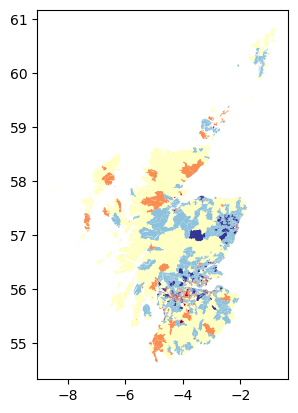

In [37]:
deprivation.plot(column="Quintilev2", cmap="RdYlBu")

##### Task 4:  the CRS of this data is ESPG:4326

In [34]:
deprivation.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

##### Task 5: the dataset contains 6976 features 

In [35]:
len(deprivation)

6976

##### Task 6: Define a sub-setting filter to create a new geopandas dataframe where you filter the selected dataset based on a categorical attribute.

In [44]:
# subset the rows based on the categorical variable 'LA Name'
deprivation2 = deprivation['LAName'] == 'Fife'
deprivation2

0       False
1       False
2       False
3       False
4       False
        ...  
6971    False
6972    False
6973    False
6974    False
6975    False
Name: LAName, Length: 6976, dtype: bool

In [45]:
# pass the series as an index to the GeoDataFrame
fife_deprivation = deprivation[deprivation2]
fife_deprivation.head(5)

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Le_1,Shape_Area,geometry
2758,S01009264,Kincardine North and Tulliallan,Fife,562,355,5056,4,8,15,73,...,4290.0,8,12,2%,2%,6203.0,26760.205094,0.333803,0.003065,"POLYGON ((-3.71332 56.10463, -3.71276 56.10459..."
2759,S01009265,Kincardine West,Fife,750,457,2310,2,4,7,34,...,4472.5,79,6,10%,1%,3455.0,3651.849197,0.043975,0.000039,"POLYGON ((-3.72472 56.07510, -3.72376 56.07392..."
2760,S01009266,Kincardine East,Fife,839,526,3273,3,5,10,47,...,3521.0,40,0,5%,0%,5918.0,3410.162272,0.044253,0.000030,"POLYGON ((-3.71158 56.07127, -3.71138 56.07117..."
2761,S01009267,Kincardine South,Fife,838,513,4260,4,7,13,62,...,5194.0,54,22,7%,3%,3843.0,3283.946981,0.042826,0.000029,"POLYGON ((-3.71523 56.06928, -3.71523 56.06898..."
2762,S01009268,Blairhall and Landward,Fife,1025,651,3280,3,5,10,48,...,4790.0,67,2,7%,0%,4982.0,24155.550170,0.313693,0.002005,"POLYGON ((-3.62531 56.11131, -3.62457 56.11109..."


##### Task 7: Define a sub-setting filter to create a new geopandas dataframe where you filter the selected dataset based on a numerical attribute.

In [52]:
# subset the rows based on the numerical variable 'Crime Rank'
deprivation3 = deprivation['CrimeRank'] >= 6000
deprivation3

0       False
1       False
2       False
3       False
4       False
        ...  
6971    False
6972    False
6973    False
6974    False
6975    False
Name: CrimeRank, Length: 6976, dtype: bool

In [53]:
# pass the series as an index to the GeoDataFrame
high_crime = deprivation[deprivation3]
high_crime.head(5)

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Le_1,Shape_Area,geometry
5,S01006511,Culter - 06,Aberdeen City,759,453,6253,5,9,18,90,...,6928.0,27,8,4%,1%,5924.0,4300.088504,0.058335,0.000059,"POLYGON ((-2.25358 57.10325, -2.25108 57.10233..."
7,S01006513,"Cults, Bieldside and Milltimber West - 01",Aberdeen City,788,406,6177,5,9,18,89,...,6928.0,15,4,3%,1%,6394.0,4077.119814,0.056620,0.000045,"POLYGON ((-2.22117 57.10770, -2.22160 57.10758..."
9,S01006515,"Cults, Bieldside and Milltimber West - 03",Aberdeen City,816,529,6363,5,10,19,92,...,6844.0,29,1,4%,0%,6174.5,15374.997633,0.208200,0.000822,"POLYGON ((-2.23261 57.12057, -2.23298 57.11680..."
12,S01006518,"Cults, Bieldside and Milltimber East - 01",Aberdeen City,664,370,6674,5,10,20,96,...,6792.0,2,0,0%,0%,6960.0,4542.507630,0.062769,0.000077,"POLYGON ((-2.21899 57.11898, -2.21705 57.11884..."
14,S01006520,"Cults, Bieldside and Milltimber East - 03",Aberdeen City,875,559,6490,5,10,19,94,...,6928.0,12,0,2%,0%,6825.0,2688.803137,0.035725,0.000030,"POLYGON ((-2.20640 57.11971, -2.20497 57.11884..."


##### Task 8: Plot the new/filtered geopandas dataframe using one of the attributes to create a choropleth map.

<AxesSubplot: >

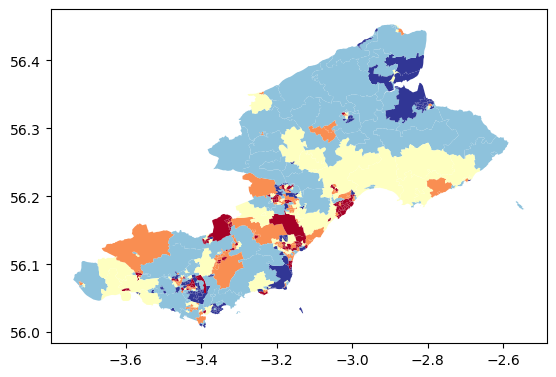

In [54]:
fife_deprivation.plot(column="Quintilev2", cmap="RdYlBu")

## Part 5: Python Rasterrio

##### install packages

In [3]:
pip install earthpy rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.1 MB/s eta 0:00:0000:01
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/97/0a/b1525be9680369cc06dd288e12c59d24d5798b4afcdcf1b0915836e1caa6/pyproj-3.6.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 66.8 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch-geometric 1.7.2 requires python-louvain, 

##### Task 1: read the file as a rasterio dataset 

In [9]:
elev = rio.open('/arcgis/home/assignment2/elev.tif')

###### Task 2: The CRS of the elev.tif is ESPG:32617 

In [34]:
print(elev.crs)

EPSG:32617


###### Task 3:  Describe the raster dataset regarding the raster extent (bounds), the reference system, and how many bands are in this dataset. 

In [35]:
print(elev.bounds)
print(elev.count)

BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
1


###### Task 4: Create a plot/map of the raster dataset

In [36]:
elev_arr = elev.read(1)
elev_arr

array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)

In [37]:
image_read_masked = np.ma.masked_array(elev_arr, mask=(elev_arr == 0))

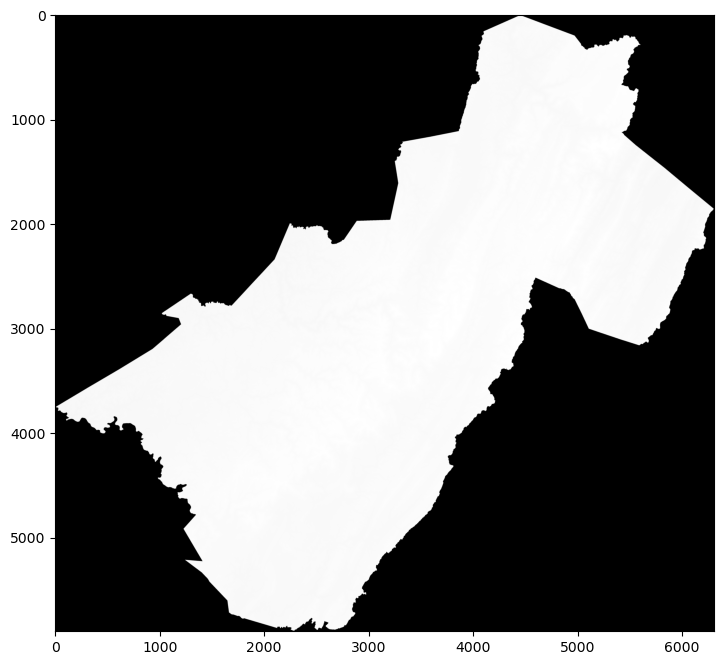

In [38]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(image_read_masked, cmap="gist_gray")

In [49]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [56]:
from rasterio.plot import show

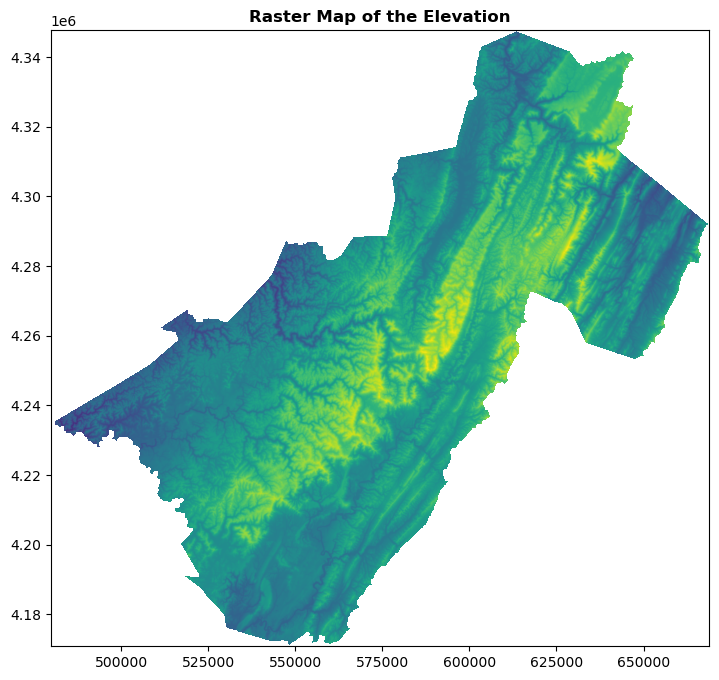

<AxesSubplot: title={'center': 'Raster Map of the Elevation'}>

In [57]:
show(elev, title='Raster Map of the Elevation', cmap='viridis')

###### Task 5:  Create Histograms from the raster

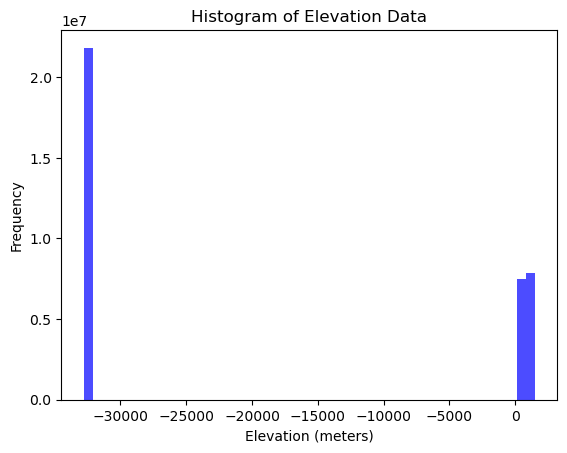

In [10]:
import numpy as np

    # Read the first band
band1 = elev.read(1)

    # Masking outliers (example: masking values greater than a threshold)
threshold = 10000  # Set an appropriate threshold for your data
band1_masked = np.ma.masked_where(band1 > threshold, band1)

    # Plot histogram
plt.hist(band1_masked.compressed(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Elevation Data")
plt.xlabel("Elevation (meters)")
plt.ylabel("Frequency")
plt.show()